In [1]:
from numpy import array
import time
import os
from itertools import product
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
import pickle

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.decomposition import PCA



from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

#Model Performance Evaluators
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

from sklearn.datasets import make_classification
from sklearn.metrics import log_loss
from joblib import parallel_backend


from sklearn.utils.class_weight import compute_class_weight

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr


from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence
from PyALE import ale


import joblib
from joblib import parallel_backend
from joblib import Parallel, delayed
import dask
from dask.distributed import Client, progress, LocalCluster, SSHCluster,wait
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence
from PyALE import ale
from dask import delayed





In [2]:
#import data

comb_dinuc_df= pd.read_csv('/shares/kslotkin_share/private/tratnayake/rubyRF/WT_dcr_red/trainRF/data_sets/WT_wtdcr_train_set1_tetra_df.txt',header=0,sep='\t')


np.shape(comb_dinuc_df)


shuf_comb_dinuc_df=comb_dinuc_df.iloc[np.random.permutation(len(comb_dinuc_df))]


#reset index
shuf_comb_dinuc_df=shuf_comb_dinuc_df.reset_index(drop=True)
#shuf_comb_dinuc_df



In [3]:
#drop seq_id
shuf_comb_dinuc_dfdrp= shuf_comb_dinuc_df.drop(['seq_id'],axis=1)
shuf_comb_dinuc_dfdrp.head()

,5p,3p,strand,ptype,length,AAAA,AAAC,AAAG,AAAT,AACA,...,TTCG,TTCT,TTGA,TTGC,TTGG,TTGT,TTTA,TTTC,TTTG,TTTT
0,717,1408,1,0,697,1,1,6,0,2,...,1,5,2,0,2,1,1,1,0,0
1,4618,4841,1,1,279,46,2,2,3,2,...,0,3,1,0,2,5,0,4,3,6
2,4712,4841,1,1,179,49,1,1,3,2,...,0,3,0,0,1,5,0,3,2,6
3,4023,4841,1,0,835,20,3,6,5,5,...,4,4,7,2,3,5,0,5,4,6
4,4844,5030,1,1,222,1,1,1,2,0,...,3,2,0,0,2,7,2,2,1,6


In [4]:
ydt=shuf_comb_dinuc_df['ptype']


xdt=shuf_comb_dinuc_df.drop(['seq_id','ptype'],axis=1)



In [5]:
######################### split data #####################################

#split test train data
Xdt_train, Xdt_test, ydt_train, ydt_test = train_test_split(xdt, ydt, test_size=0.2, random_state=256)

Xdt_train.shape, Xdt_test.shape


((2372436, 260), (593110, 260))

In [7]:
with parallel_backend('threading',n_jobs=48 ):
    
    rfc_ttcomb = RandomForestClassifier(random_state=3500,n_estimators = 300,n_jobs=48)
#class_weight=dict(enumerate(class_weights) ))
    
    print('training >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
    
    rfc_ttcomb.fit(Xdt_train, ydt_train)


    

    y_pred =  rfc_ttcomb.predict(Xdt_test)

training >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


In [7]:
# test accuracy score 

from sklearn.metrics import accuracy_score

print('Model test accuracy : {0:0.4f}'. format(accuracy_score(ydt_test, y_pred)))



print ("\nClassification report :\n",(classification_report(ydt_test,y_pred)))



Model test accuracy : 0.8535

Classification report :
               precision    recall  f1-score   support

           0       0.87      0.84      0.86    314026
           1       0.83      0.86      0.85    279084

    accuracy                           0.85    593110
   macro avg       0.85      0.85      0.85    593110
weighted avg       0.85      0.85      0.85    593110



In [12]:
mfilename='/shares/kslotkin_share/private/tratnayake/frNAnet/models/rfc_WTvdcr_comb_tetra_set1_v2_wg.pkl'

pickle.dump( rfc_ttcomb,open(mfilename,'wb'))

In [10]:
#client = Client(processes=False, threads_per_worker=1, n_workers=48, memory_limit='256GB')


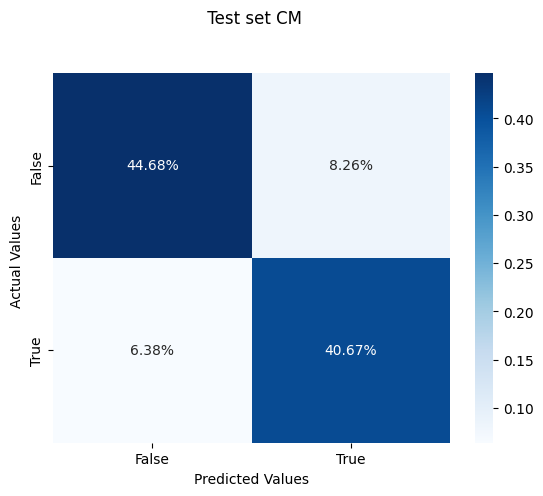

In [11]:
#plt.rcParams.update({'font.size': 20})

# #####################################  CONFUSION MATRIX for test set   ########################################################################
#fig1=plt.figure(figsize = (8,8))

fig1=plt.figure()
cm = confusion_matrix(y_true=ydt_test, y_pred=y_pred)

ax = sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%', cmap='Blues')

ax.set_title(' Test set CM\n\n');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


fig1 = ax.get_figure()


In [1]:
client = Client(processes=False, threads_per_worker=1, n_workers=48, memory_limit='256GB')

NameError: name 'Client' is not defined

distributed.worker:INFO: -------------------------------------------------
distributed.worker:INFO:       Start worker at: inproc://10.5.1.62/61027/25
distributed.worker:INFO:          Listening to:            inproc10.5.1.62
distributed.worker:INFO:           Worker name:                         21
distributed.worker:INFO:          dashboard at:            10.5.1.62:43742
distributed.worker:INFO: Waiting to connect to: inproc://10.5.1.62/61027/1
distributed.worker:INFO: -------------------------------------------------
distributed.worker:INFO:               Threads:                          1
distributed.worker:INFO:                Memory:                 238.42 GiB
distributed.worker:INFO:       Local Directory: /scratch/dir_58104/dask-scratch-space/worker-t_ijeb3g
distributed.worker:INFO: -------------------------------------------------
distributed.worker:INFO:       Start worker at: inproc://10.5.1.62/61027/26
distributed.worker:INFO:          Listening to:            inproc10.5.1

distributed.worker:INFO: -------------------------------------------------
distributed.worker:INFO:               Threads:                          1
distributed.worker:INFO:                Memory:                 238.42 GiB
distributed.worker:INFO:       Local Directory: /scratch/dir_58104/dask-scratch-space/worker-phi6ere1
distributed.worker:INFO: -------------------------------------------------
distributed.worker:INFO:       Start worker at: inproc://10.5.1.62/61027/36
distributed.worker:INFO:          Listening to:            inproc10.5.1.62
distributed.worker:INFO:           Worker name:                         32
distributed.worker:INFO:          dashboard at:            10.5.1.62:33043
distributed.worker:INFO: Waiting to connect to: inproc://10.5.1.62/61027/1
distributed.worker:INFO: -------------------------------------------------
distributed.worker:INFO:               Threads:                          1
distributed.worker:INFO:                Memory:                 238.42 G

distributed.worker:INFO:          Listening to:            inproc10.5.1.62
distributed.worker:INFO:           Worker name:                         42
distributed.worker:INFO:          dashboard at:            10.5.1.62:38715
distributed.worker:INFO: Waiting to connect to: inproc://10.5.1.62/61027/1
distributed.worker:INFO: -------------------------------------------------
distributed.worker:INFO:               Threads:                          1
distributed.worker:INFO:                Memory:                 238.42 GiB
distributed.worker:INFO:       Local Directory: /scratch/dir_58104/dask-scratch-space/worker-n9ul0gmi
distributed.worker:INFO: -------------------------------------------------
distributed.worker:INFO:       Start worker at: inproc://10.5.1.62/61027/47
distributed.worker:INFO:          Listening to:            inproc10.5.1.62
distributed.worker:INFO:           Worker name:                         43
distributed.worker:INFO:          dashboard at:            10.5.1.62:393

distributed.core:INFO: Starting established connection to inproc://10.5.1.62/61027/63
distributed.scheduler:INFO: Register worker <WorkerState 'inproc://10.5.1.62/61027/16', name: 12, status: init, memory: 0, processing: 0>
distributed.scheduler:INFO: Starting worker compute stream, inproc://10.5.1.62/61027/16
distributed.core:INFO: Starting established connection to inproc://10.5.1.62/61027/64
distributed.scheduler:INFO: Register worker <WorkerState 'inproc://10.5.1.62/61027/17', name: 13, status: init, memory: 0, processing: 0>
distributed.scheduler:INFO: Starting worker compute stream, inproc://10.5.1.62/61027/17
distributed.core:INFO: Starting established connection to inproc://10.5.1.62/61027/65
distributed.scheduler:INFO: Register worker <WorkerState 'inproc://10.5.1.62/61027/18', name: 14, status: init, memory: 0, processing: 0>
distributed.scheduler:INFO: Starting worker compute stream, inproc://10.5.1.62/61027/18
distributed.core:INFO: Starting established connection to inproc

distributed.scheduler:INFO: Register worker <WorkerState 'inproc://10.5.1.62/61027/42', name: 38, status: init, memory: 0, processing: 0>
distributed.scheduler:INFO: Starting worker compute stream, inproc://10.5.1.62/61027/42
distributed.core:INFO: Starting established connection to inproc://10.5.1.62/61027/90
distributed.scheduler:INFO: Register worker <WorkerState 'inproc://10.5.1.62/61027/43', name: 39, status: init, memory: 0, processing: 0>
distributed.scheduler:INFO: Starting worker compute stream, inproc://10.5.1.62/61027/43
distributed.core:INFO: Starting established connection to inproc://10.5.1.62/61027/91
distributed.scheduler:INFO: Register worker <WorkerState 'inproc://10.5.1.62/61027/44', name: 40, status: init, memory: 0, processing: 0>
distributed.scheduler:INFO: Starting worker compute stream, inproc://10.5.1.62/61027/44
distributed.core:INFO: Starting established connection to inproc://10.5.1.62/61027/92
distributed.scheduler:INFO: Register worker <WorkerState 'inproc

distributed.worker:INFO:         Registered to: inproc://10.5.1.62/61027/1
distributed.worker:INFO: -------------------------------------------------
distributed.worker:INFO:         Registered to: inproc://10.5.1.62/61027/1
distributed.worker:INFO: -------------------------------------------------
distributed.worker:INFO:         Registered to: inproc://10.5.1.62/61027/1
distributed.worker:INFO: -------------------------------------------------
distributed.worker:INFO:         Registered to: inproc://10.5.1.62/61027/1
distributed.worker:INFO: -------------------------------------------------
distributed.worker:INFO:         Registered to: inproc://10.5.1.62/61027/1
distributed.worker:INFO: -------------------------------------------------
distributed.worker:INFO:         Registered to: inproc://10.5.1.62/61027/1
distributed.worker:INFO: -------------------------------------------------
distributed.worker:INFO:         Registered to: inproc://10.5.1.62/61027/1
distributed.worker:INFO: 

distributed.core:INFO: Starting established connection to inproc://10.5.1.62/61027/1
distributed.core:INFO: Starting established connection to inproc://10.5.1.62/61027/1
distributed.core:INFO: Starting established connection to inproc://10.5.1.62/61027/1
distributed.core:INFO: Starting established connection to inproc://10.5.1.62/61027/1
distributed.core:INFO: Starting established connection to inproc://10.5.1.62/61027/1
distributed.core:INFO: Starting established connection to inproc://10.5.1.62/61027/1
distributed.core:INFO: Starting established connection to inproc://10.5.1.62/61027/1
distributed.core:INFO: Starting established connection to inproc://10.5.1.62/61027/1
distributed.scheduler:INFO: Receive client connection: Client-882691d2-f6ce-11ee-ae63-2c600c73904e
distributed.core:INFO: Starting established connection to inproc://10.5.1.62/61027/100


In [9]:
# # #########################################################  Permutation Based Feature Importance ###################################################
start_time=time.time()


# Scatter X data to workers
Xdt_test_dask = client.scatter(Xdt_test, broadcast=True)
# Scatter y data to workers
ydt_test_dask = client.scatter(ydt_test, broadcast=True)  


@dask.delayed
def compute_permutation_importance(model, X, y, n_repeats=10, random_state=42):
    
    result = permutation_importance(model, X, y, n_repeats=n_repeats, random_state=random_state)
    return result

# Compute permutation importance with Dask delayed computation
perm_importance_delayed = compute_permutation_importance(rfc_ttcomb, Xdt_test_dask, ydt_test_dask)

# Compute the result
perm_importance_t3 = perm_importance_delayed.compute()


end_time=time.time()
total_time=end_time-start_time
print("execution time",total_time,"s")


/home/tratnayake/miniconda3/envs/ML_sick_jpy/lib/python3.10/site-packages/distributed/client.py:3157: UserWarning: Sending large graph of size 13.89 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
distributed.core:INFO: Event loop was unresponsive in Worker for 24.11s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 24.12s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 24.13s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 24.13s.  This is often caused by long-running GIL-holding 

distributed.core:INFO: Event loop was unresponsive in Worker for 24.17s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 24.17s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 24.17s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 24.17s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 24.17s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can ca

execution time 37989.64837694168 s


In [10]:
sorted_idx = perm_importance_t3.importances_mean.argsort()
top_fidx=sorted_idx[-22:]

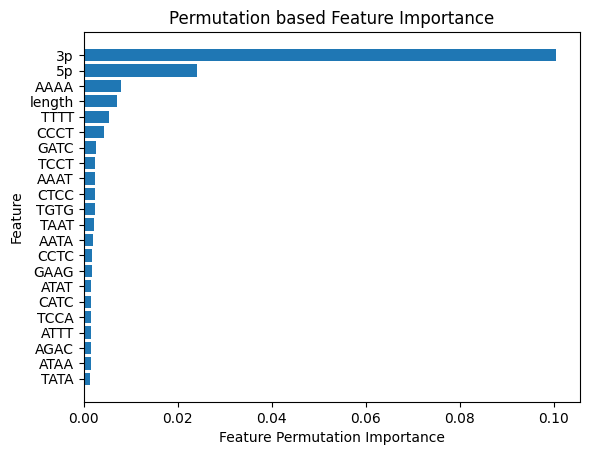

In [11]:
plt.rcParams.update({'font.size': 10})
fig4=plt.figure()
plt.barh(Xdt_train.columns[top_fidx], perm_importance_t3.importances_mean[top_fidx])
plt.xlabel("Feature Permutation Importance")
plt.ylabel('Feature')
plt.title('Permutation based Feature Importance')

fig4.savefig("Permutation_based_FI_tetra_nuc_AR_DCL.pdf")

In [15]:
client.close()

In [2]:
#Partial dependence analysis
terafetures=['3p','5p','AAAA','length']

In [17]:
client = Client(processes=False, threads_per_worker=1, n_workers=48, memory_limit='256GB')

distributed.scheduler:INFO: State start
distributed.scheduler:INFO:   Scheduler at: inproc://10.5.1.62/61027/294
distributed.scheduler:INFO:   dashboard at:  http://10.5.1.62:8787/status
distributed.scheduler:INFO: Registering Worker plugin shuffle
distributed.worker:INFO:       Start worker at: inproc://10.5.1.62/61027/297
distributed.worker:INFO:          Listening to:            inproc10.5.1.62
distributed.worker:INFO:           Worker name:                          0
distributed.worker:INFO:          dashboard at:            10.5.1.62:40476
distributed.worker:INFO: Waiting to connect to: inproc://10.5.1.62/61027/294
distributed.worker:INFO: -------------------------------------------------
distributed.worker:INFO:               Threads:                          1
distributed.worker:INFO:                Memory:                 238.42 GiB
distributed.worker:INFO:       Local Directory: /scratch/dir_58104/dask-scratch-space/worker-55sw42b6
distributed.worker:INFO: --------------------

distributed.worker:INFO:           Worker name:                         10
distributed.worker:INFO:          dashboard at:            10.5.1.62:39342
distributed.worker:INFO: Waiting to connect to: inproc://10.5.1.62/61027/294
distributed.worker:INFO: -------------------------------------------------
distributed.worker:INFO:               Threads:                          1
distributed.worker:INFO:                Memory:                 238.42 GiB
distributed.worker:INFO:       Local Directory: /scratch/dir_58104/dask-scratch-space/worker-v6dnws33
distributed.worker:INFO: -------------------------------------------------
distributed.worker:INFO:       Start worker at: inproc://10.5.1.62/61027/308
distributed.worker:INFO:          Listening to:            inproc10.5.1.62
distributed.worker:INFO:           Worker name:                         11
distributed.worker:INFO:          dashboard at:            10.5.1.62:33199
distributed.worker:INFO: Waiting to connect to: inproc://10.5.1.62/61

distributed.worker:INFO:       Local Directory: /scratch/dir_58104/dask-scratch-space/worker-i2fp8nyy
distributed.worker:INFO: -------------------------------------------------
distributed.worker:INFO:       Start worker at: inproc://10.5.1.62/61027/318
distributed.worker:INFO:          Listening to:            inproc10.5.1.62
distributed.worker:INFO:           Worker name:                         21
distributed.worker:INFO:          dashboard at:            10.5.1.62:44707
distributed.worker:INFO: Waiting to connect to: inproc://10.5.1.62/61027/294
distributed.worker:INFO: -------------------------------------------------
distributed.worker:INFO:               Threads:                          1
distributed.worker:INFO:                Memory:                 238.42 GiB
distributed.worker:INFO:       Local Directory: /scratch/dir_58104/dask-scratch-space/worker-enww50ds
distributed.worker:INFO: -------------------------------------------------
distributed.worker:INFO:       Start worke

distributed.worker:INFO:          dashboard at:            10.5.1.62:37235
distributed.worker:INFO: Waiting to connect to: inproc://10.5.1.62/61027/294
distributed.worker:INFO: -------------------------------------------------
distributed.worker:INFO:               Threads:                          1
distributed.worker:INFO:                Memory:                 238.42 GiB
distributed.worker:INFO:       Local Directory: /scratch/dir_58104/dask-scratch-space/worker-p14xvrnc
distributed.worker:INFO: -------------------------------------------------
distributed.worker:INFO:       Start worker at: inproc://10.5.1.62/61027/329
distributed.worker:INFO:          Listening to:            inproc10.5.1.62
distributed.worker:INFO:           Worker name:                         32
distributed.worker:INFO:          dashboard at:            10.5.1.62:35185
distributed.worker:INFO: Waiting to connect to: inproc://10.5.1.62/61027/294
distributed.worker:INFO: ------------------------------------------

distributed.worker:INFO: -------------------------------------------------
distributed.worker:INFO:       Start worker at: inproc://10.5.1.62/61027/339
distributed.worker:INFO:          Listening to:            inproc10.5.1.62
distributed.worker:INFO:           Worker name:                         42
distributed.worker:INFO:          dashboard at:            10.5.1.62:36832
distributed.worker:INFO: Waiting to connect to: inproc://10.5.1.62/61027/294
distributed.worker:INFO: -------------------------------------------------
distributed.worker:INFO:               Threads:                          1
distributed.worker:INFO:                Memory:                 238.42 GiB
distributed.worker:INFO:       Local Directory: /scratch/dir_58104/dask-scratch-space/worker-bsy63t14
distributed.worker:INFO: -------------------------------------------------
distributed.worker:INFO:       Start worker at: inproc://10.5.1.62/61027/340
distributed.worker:INFO:          Listening to:            inproc10

distributed.scheduler:INFO: Register worker <WorkerState 'inproc://10.5.1.62/61027/308', name: 11, status: init, memory: 0, processing: 0>
distributed.scheduler:INFO: Starting worker compute stream, inproc://10.5.1.62/61027/308
distributed.core:INFO: Starting established connection to inproc://10.5.1.62/61027/356
distributed.scheduler:INFO: Register worker <WorkerState 'inproc://10.5.1.62/61027/309', name: 12, status: init, memory: 0, processing: 0>
distributed.scheduler:INFO: Starting worker compute stream, inproc://10.5.1.62/61027/309
distributed.core:INFO: Starting established connection to inproc://10.5.1.62/61027/357
distributed.scheduler:INFO: Register worker <WorkerState 'inproc://10.5.1.62/61027/310', name: 13, status: init, memory: 0, processing: 0>
distributed.scheduler:INFO: Starting worker compute stream, inproc://10.5.1.62/61027/310
distributed.core:INFO: Starting established connection to inproc://10.5.1.62/61027/358
distributed.scheduler:INFO: Register worker <WorkerStat

distributed.scheduler:INFO: Starting worker compute stream, inproc://10.5.1.62/61027/334
distributed.core:INFO: Starting established connection to inproc://10.5.1.62/61027/382
distributed.scheduler:INFO: Register worker <WorkerState 'inproc://10.5.1.62/61027/335', name: 38, status: init, memory: 0, processing: 0>
distributed.scheduler:INFO: Starting worker compute stream, inproc://10.5.1.62/61027/335
distributed.core:INFO: Starting established connection to inproc://10.5.1.62/61027/383
distributed.scheduler:INFO: Register worker <WorkerState 'inproc://10.5.1.62/61027/336', name: 39, status: init, memory: 0, processing: 0>
distributed.scheduler:INFO: Starting worker compute stream, inproc://10.5.1.62/61027/336
distributed.core:INFO: Starting established connection to inproc://10.5.1.62/61027/384
distributed.scheduler:INFO: Register worker <WorkerState 'inproc://10.5.1.62/61027/337', name: 40, status: init, memory: 0, processing: 0>
distributed.scheduler:INFO: Starting worker compute str

distributed.worker:INFO: -------------------------------------------------
distributed.worker:INFO:         Registered to: inproc://10.5.1.62/61027/294
distributed.worker:INFO: -------------------------------------------------
distributed.worker:INFO:         Registered to: inproc://10.5.1.62/61027/294
distributed.worker:INFO: -------------------------------------------------
distributed.worker:INFO:         Registered to: inproc://10.5.1.62/61027/294
distributed.worker:INFO: -------------------------------------------------
distributed.worker:INFO:         Registered to: inproc://10.5.1.62/61027/294
distributed.worker:INFO: -------------------------------------------------
distributed.worker:INFO:         Registered to: inproc://10.5.1.62/61027/294
distributed.worker:INFO: -------------------------------------------------
distributed.worker:INFO:         Registered to: inproc://10.5.1.62/61027/294
distributed.worker:INFO: -------------------------------------------------
distributed.w

distributed.core:INFO: Starting established connection to inproc://10.5.1.62/61027/294
distributed.core:INFO: Starting established connection to inproc://10.5.1.62/61027/294
distributed.core:INFO: Starting established connection to inproc://10.5.1.62/61027/294
distributed.core:INFO: Starting established connection to inproc://10.5.1.62/61027/294
distributed.core:INFO: Starting established connection to inproc://10.5.1.62/61027/294
distributed.core:INFO: Starting established connection to inproc://10.5.1.62/61027/294
distributed.core:INFO: Starting established connection to inproc://10.5.1.62/61027/294
distributed.core:INFO: Starting established connection to inproc://10.5.1.62/61027/294
distributed.core:INFO: Starting established connection to inproc://10.5.1.62/61027/294
distributed.core:INFO: Starting established connection to inproc://10.5.1.62/61027/294
distributed.core:INFO: Starting established connection to inproc://10.5.1.62/61027/294
distributed.core:INFO: Starting established

/home/tratnayake/miniconda3/envs/ML_sick_jpy/lib/python3.10/site-packages/distributed/client.py:3157: UserWarning: Sending large graph of size 13.89 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
distributed.core:INFO: Event loop was unresponsive in Worker for 24.33s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 24.33s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 24.34s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 48.02s.  This is often caused by long-running GIL-holding 

distributed.core:INFO: Event loop was unresponsive in Worker for 48.07s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 48.07s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 48.07s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 48.07s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 48.08s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can ca

distributed.core:INFO: Event loop was unresponsive in Worker for 19.18s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 19.18s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 19.18s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 19.18s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 19.18s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can ca

distributed.core:INFO: Event loop was unresponsive in Worker for 18.04s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 18.04s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 18.04s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 18.04s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 18.04s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can ca

distributed.core:INFO: Event loop was unresponsive in Worker for 3.49s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 3.49s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 3.49s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 3.49s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 3.50s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause t

distributed.core:INFO: Event loop was unresponsive in Worker for 3.60s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 3.60s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 3.30s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 3.31s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 3.31s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause t

distributed.core:INFO: Event loop was unresponsive in Worker for 3.56s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 3.56s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 3.56s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 3.56s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 3.57s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause t

distributed.core:INFO: Event loop was unresponsive in Worker for 3.09s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 3.09s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 3.09s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 3.09s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 3.10s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause t

distributed.core:INFO: Event loop was unresponsive in Worker for 4.00s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 4.01s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 3.99s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 4.00s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 4.01s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause t

distributed.core:INFO: Event loop was unresponsive in Worker for 3.33s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 3.33s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 3.33s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 3.34s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 3.34s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause t

distributed.utils_perf:INFO: full garbage collection released 1.03 GiB from 1097 reference cycles (threshold: 9.54 MiB)
distributed.utils_perf:INFO: full garbage collection released 830.05 MiB from 814 reference cycles (threshold: 9.54 MiB)
distributed.core:INFO: Event loop was unresponsive in Worker for 3.09s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 3.11s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 3.11s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 3.12s.  This is often caused by long-running GIL-holding functions or moving la

distributed.core:INFO: Event loop was unresponsive in Worker for 3.39s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 3.39s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 3.39s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 3.39s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 3.38s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause t

distributed.core:INFO: Event loop was unresponsive in Worker for 3.52s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 3.52s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 3.54s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 3.54s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 3.55s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause t

distributed.core:INFO: Event loop was unresponsive in Worker for 3.56s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 3.57s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 3.55s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 3.55s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 3.55s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause t

distributed.core:INFO: Event loop was unresponsive in Worker for 3.29s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 3.29s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 3.29s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Scheduler for 3.30s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 3.30s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can caus

distributed.core:INFO: Event loop was unresponsive in Worker for 3.37s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 3.38s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 3.38s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 3.38s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 3.38s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause t

distributed.core:INFO: Event loop was unresponsive in Worker for 3.07s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 3.08s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 3.08s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 3.08s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 3.08s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause t

distributed.core:INFO: Event loop was unresponsive in Worker for 4.27s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 4.27s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 4.28s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 4.28s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 4.29s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause t

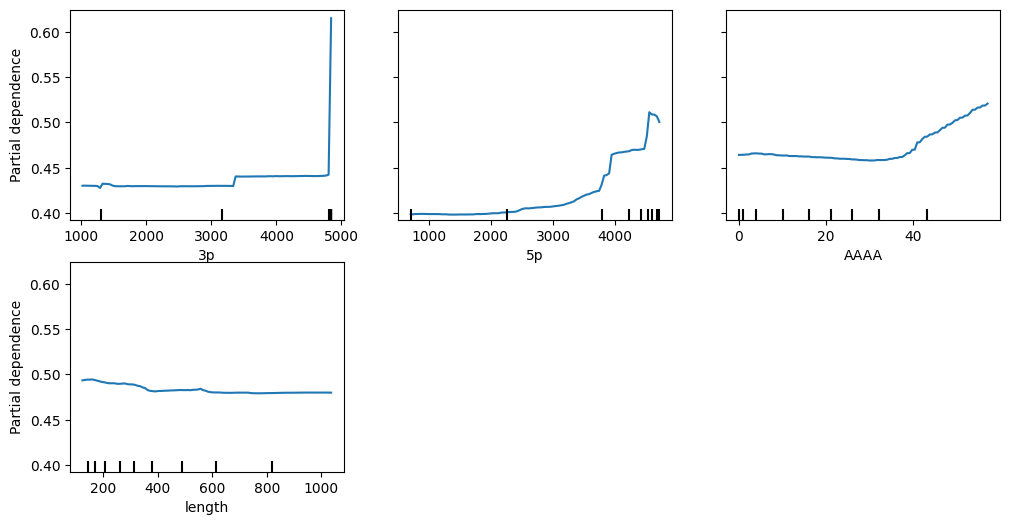

In [18]:
with joblib.parallel_backend('dask'): 


# fig5 = plt.figure(figsize=(30, 30))
# plot_partial_dependence(estimator=rfc_ttcomb,X=Xdt_test,features=terafetures,n_jobs=48)
# plt.show()


    fig1, ax = plt.subplots(figsize=(12, 6))

    tree_disp = PartialDependenceDisplay.from_estimator(rfc_ttcomb,X=Xdt_test,features=terafetures, ax=ax,n_jobs=32)


In [20]:
fig1.savefig('SR_DCL1234_pdp.pdf',dpi=300)

In [21]:
client.close()

distributed.scheduler:INFO: Remove client Client-a024f4a7-f745-11ee-ae63-2c600c73904e
distributed.core:INFO: Received 'close-stream' from inproc://10.5.1.62/61027/393; closing.
distributed.scheduler:INFO: Remove client Client-a024f4a7-f745-11ee-ae63-2c600c73904e
distributed.scheduler:INFO: Close client connection: Client-a024f4a7-f745-11ee-ae63-2c600c73904e
distributed.scheduler:INFO: Retire worker addresses [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]
distributed.worker:INFO: Stopping worker at inproc://10.5.1.62/61027/297. Reason: worker-close
distributed.worker:INFO: Stopping worker at inproc://10.5.1.62/61027/298. Reason: worker-close
distributed.worker:INFO: Stopping worker at inproc://10.5.1.62/61027/299. Reason: worker-close
distributed.worker:INFO: Stopping worker at inproc://10.5.1.62/61027/300. Reason: worker-close
distributed.worker:INFO: 

distributed.core:INFO: Received 'close-stream' from inproc://10.5.1.62/61027/379; closing.
distributed.core:INFO: Received 'close-stream' from inproc://10.5.1.62/61027/380; closing.
distributed.core:INFO: Received 'close-stream' from inproc://10.5.1.62/61027/381; closing.
distributed.core:INFO: Received 'close-stream' from inproc://10.5.1.62/61027/382; closing.
distributed.core:INFO: Received 'close-stream' from inproc://10.5.1.62/61027/383; closing.
distributed.core:INFO: Received 'close-stream' from inproc://10.5.1.62/61027/384; closing.
distributed.core:INFO: Received 'close-stream' from inproc://10.5.1.62/61027/385; closing.
distributed.core:INFO: Received 'close-stream' from inproc://10.5.1.62/61027/386; closing.
distributed.core:INFO: Received 'close-stream' from inproc://10.5.1.62/61027/387; closing.
distributed.core:INFO: Received 'close-stream' from inproc://10.5.1.62/61027/388; closing.
distributed.core:INFO: Received 'close-stream' from inproc://10.5.1.62/61027/389; closing.

distributed.scheduler:INFO: Remove worker <WorkerState 'inproc://10.5.1.62/61027/333', name: 36, status: closing, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1712762317.4066606')
distributed.scheduler:INFO: Remove worker <WorkerState 'inproc://10.5.1.62/61027/334', name: 37, status: closing, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1712762317.408059')
distributed.scheduler:INFO: Remove worker <WorkerState 'inproc://10.5.1.62/61027/335', name: 38, status: closing, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1712762317.4116116')
distributed.scheduler:INFO: Remove worker <WorkerState 'inproc://10.5.1.62/61027/336', name: 39, status: closing, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1712762317.4128993')
distributed.scheduler:INFO: Remove worker <WorkerState 'inproc://10.5.1.62/61027/337', name: 40, status: closing, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1712762317.414159')
distributed.sched

In [ ]:
ale_eff = ale(X=Xdt_test,model=rfc_ttcomb,feature=['3p'],feature_type='continuous',grid_size=50,include_CI=True,C=0.95) 

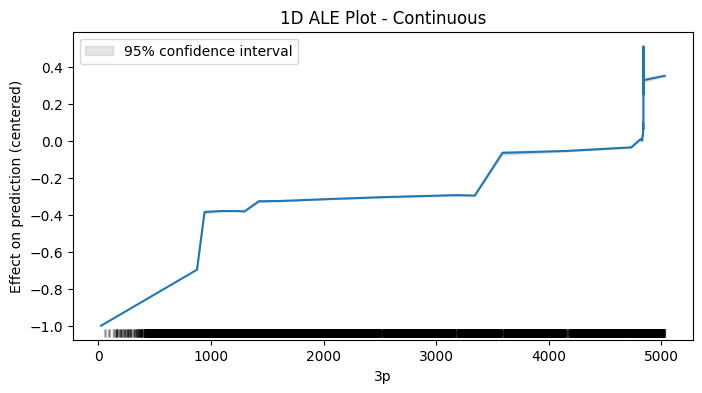